In [69]:
from stepPlay import * 
from policy_value_net_numpy import *

def prn_obj(obj):
    print('\n'.join(['%s:%s' % item for item in obj.__dict__.items()]))

In [70]:
n = 5
width, height = 8, 8
model_file =  'best_policy_8_8_5.model'

board = Board(width=width, height=height, n_in_row=n)
game = Game(board)

# ############### human VS AI ###################
# load the trained policy_value_net in either Theano/Lasagne, PyTorch or TensorFlow

# best_policy = PolicyValueNet(width, height, model_file = model_file)
# mcts_player = MCTSPlayer(best_policy.policy_value_fn, c_puct=5, n_playout=400)

# load the provided model (trained in Theano/Lasagne) into a MCTS player written in pure numpy
try:
    policy_param = pickle.load(open(model_file, 'rb'))
except:
    policy_param = pickle.load(open(model_file, 'rb'),
                               encoding='bytes')  # To support python3
#得到策略                               
best_policy = PolicyValueNetNumpy(width, height, policy_param)
#得到策略函数
mcts_player1 = MCTSPlayer(best_policy.policy_value_fn,
                         c_puct=5,
                         n_playout=400)  # set larger n_playout for better performance

mcts_player2 = MCTSPlayer(best_policy.policy_value_fn,
                         c_puct=5,
                         n_playout=400)  

# uncomment the following line to play with pure MCTS (it's much weaker even with a larger n_playout)
# mcts_player = MCTS_Pure(c_puct=5, n_playout=1000)

# human player, input your move in the format: 2,3
human = Human()

player1 =  mcts_player1
player2 =  mcts_player2
start_player=0 
is_shown=1

game.board.init_board(start_player)
p1, p2 = game.board.players
player1.set_player_ind(p1)
player2.set_player_ind(p2)
players = {p1: player1, p2: player2}



In [74]:
current_player = game.board.get_current_player()
player_in_turn = players[current_player]
#get_action 得到当前动作
move = player_in_turn.get_action(game.board)
#print("current_player=%d , move=%d " %(current_player,move))
game.board.do_move(move)
state=game.board.current_state()
#print(state)
game.graphic(game.board, player1.player, player2.player)

Player 1 with X
Player 2 with O

       0       1       2       3       4       5       6       7

   7   _       _       _       _       _       _       _       _    


   6   _       _       _       _       _       _       _       _    


   5   _       _       _       _       O       _       _       _    


   4   _       _       _       O       X       _       _       _    


   3   _       _       _       _       X       _       _       _    


   2   _       _       _       _       _       _       _       _    


   1   _       _       _       _       _       _       _       _    


   0   _       _       _       _       _       _       _       _    




In [75]:
X = state.reshape(-1, 4, best_policy.board_width, best_policy.board_height)
x = conv_forward(X,best_policy.params[0],best_policy.params[1])
y=relu(x)

In [76]:
print(state)
print(x)
print(y)

[[[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]]]
[[[[-0.1386052  -0.04081807 -0.04081807 ... -0.04081807 -0.04081807
    -0.08006948]
   [-0.1447

In [77]:
print(y.shape)
print(y[0][0])

(1, 32, 8, 8)
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.12441941 0.08896522 0.03791264
  0.         0.        ]
 [0.         0.         0.         0.34556226 0.38895498 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.51579333 0.21660316
  0.         0.        ]
 [0.         0.         0.         0.         0.0252284  0.36358885
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


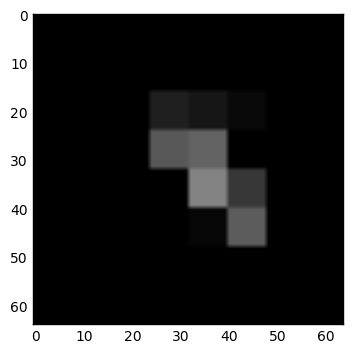

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
#from skimage import transform,data,io

img=Image.fromarray(y[0][0]*255)
#
#new_img=transform.rescale(img, [5,5])
new_img =  img.resize((64,64))
#可以调用Image库下的函数了，比如show()
#new_img.show()
plt.savefig("./play/numpy/test/1.png")
plt.imshow(new_img)


In [79]:
img=Image.fromarray(y[0][1]*255)
#
#new_img=transform.rescale(img, [5,5])
new_img =  img.resize((64,64))
#可以调用Image库下的函数了，比如show()
#new_img.show()


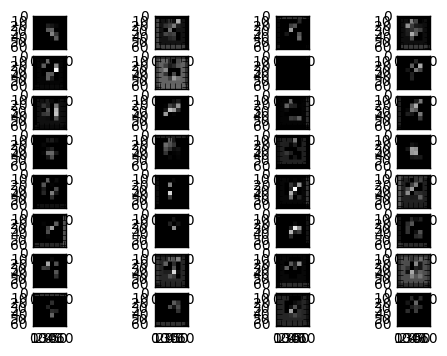

In [80]:
for  i in range(0,32): 
        img=Image.fromarray(y[0 ][i]*255)
        new_img =  img.resize((64,64))
        #new_img.show()
        
        plt.subplot(8,4, i+1)
        plt.imshow(new_img)

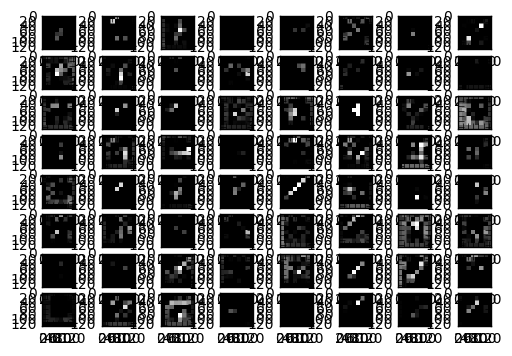

In [81]:
y1 = relu(conv_forward(y,best_policy.params[2],best_policy.params[3]))
for  i in range(0,64): 
        img=Image.fromarray(y1[0 ][i]*255)
        new_img =  img.resize((128,128))
        #new_img.show()
        
        plt.subplot(8,8, i+1)
        plt.imshow(new_img)

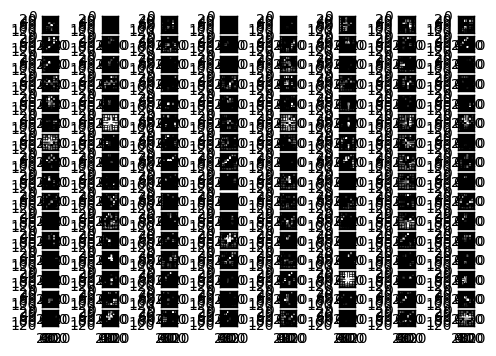

In [82]:
y2 = relu(conv_forward(y1,best_policy.params[4],best_policy.params[5]))
for  i in range(0,128): 
        img=Image.fromarray(y2[0 ][i]*255)
        new_img =  img.resize((128,128))
        #new_img.show()
        
        plt.subplot(16,8, i+1)
        plt.imshow(new_img)

In [83]:
X_p = relu(conv_forward(y2, best_policy.params[6], best_policy.params[7], padding=0))
X_p1 = fc_forward(X_p.flatten(), best_policy.params[8], best_policy.params[9])
act_probs = softmax(X_p1)
print(act_probs)


[9.03904550e-04 5.04583619e-04 2.80121641e-04 2.10116858e-04
 3.42029898e-03 1.36521380e-04 4.08967921e-04 5.77480507e-04
 1.18333019e-03 2.72859210e-04 2.06662476e-03 7.16061756e-04
 2.44929768e-02 9.07132459e-04 1.33435621e-04 3.81236535e-04
 2.61756276e-04 7.65594756e-03 1.42159359e-02 1.01931174e-02
 1.44320341e-01 8.21099718e-03 1.47863770e-03 4.63640576e-04
 2.19300396e-04 1.04331269e-03 4.66166798e-01 1.01997632e-01
 5.81524943e-05 1.57195913e-02 8.66746984e-03 5.47198325e-04
 2.95443199e-04 3.83067604e-04 1.06055515e-03 9.92913518e-05
 1.98890535e-04 1.27243335e-02 1.18186480e-03 3.85239925e-04
 2.13855007e-04 7.53162107e-04 3.95754380e-03 3.69529548e-02
 2.35194829e-05 2.15678446e-02 2.01384592e-03 4.03073820e-04
 1.15912641e-03 1.94419282e-04 1.43523933e-03 1.53368204e-03
 1.14366250e-03 8.83929394e-02 3.77512442e-04 4.67976055e-04
 8.15782890e-04 4.88198352e-04 4.40437183e-04 5.99445283e-04
 4.19239265e-04 1.37659580e-04 1.96488548e-03 3.99827814e-04]


In [84]:
data = act_probs.reshape(8,8)
print(data)

[[9.03904550e-04 5.04583619e-04 2.80121641e-04 2.10116858e-04
  3.42029898e-03 1.36521380e-04 4.08967921e-04 5.77480507e-04]
 [1.18333019e-03 2.72859210e-04 2.06662476e-03 7.16061756e-04
  2.44929768e-02 9.07132459e-04 1.33435621e-04 3.81236535e-04]
 [2.61756276e-04 7.65594756e-03 1.42159359e-02 1.01931174e-02
  1.44320341e-01 8.21099718e-03 1.47863770e-03 4.63640576e-04]
 [2.19300396e-04 1.04331269e-03 4.66166798e-01 1.01997632e-01
  5.81524943e-05 1.57195913e-02 8.66746984e-03 5.47198325e-04]
 [2.95443199e-04 3.83067604e-04 1.06055515e-03 9.92913518e-05
  1.98890535e-04 1.27243335e-02 1.18186480e-03 3.85239925e-04]
 [2.13855007e-04 7.53162107e-04 3.95754380e-03 3.69529548e-02
  2.35194829e-05 2.15678446e-02 2.01384592e-03 4.03073820e-04]
 [1.15912641e-03 1.94419282e-04 1.43523933e-03 1.53368204e-03
  1.14366250e-03 8.83929394e-02 3.77512442e-04 4.67976055e-04]
 [8.15782890e-04 4.88198352e-04 4.40437183e-04 5.99445283e-04
  4.19239265e-04 1.37659580e-04 1.96488548e-03 3.99827814e-04]]

Player 1 with X
Player 2 with O

       0       1       2       3       4       5       6       7

   7   _       _       _       _       _       _       _       _    


   6   _       _       _       _       _       _       _       _    


   5   _       _       _       _       O       _       _       _    


   4   _       _       _       O       X       _       _       _    


   3   _       _       _       _       X       _       _       _    


   2   _       _       _       _       _       _       _       _    


   1   _       _       _       _       _       _       _       _    


   0   _       _       _       _       _       _       _       _    




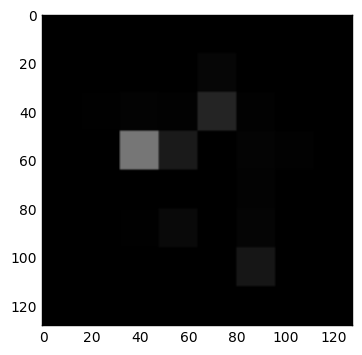

In [85]:
img=Image.fromarray(data*255)
new_img =  img.resize((128,128))
        #new_img.show()
        
        
plt.imshow(new_img)
game.graphic(game.board, player1.player, player2.player)

In [86]:
state=game.board.current_state()
print(state)
game.graphic(game.board, player1.player, player2.player)

[[[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]]]
Player 1 with X
Player 2 with O

       0       1       2       3       4       5       6       